In [4]:
%load_ext nb_black
import os
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter, FormatStrFormatter

plt.style.reload_library()
plt.style.use(["science", "no-latex", "ieee"])

pd.set_option("display.float_format", lambda x: "%.8g" % x)
# pd.set_option("precision", 8)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [5]:
cols = ["fs", "method", "coef", "mul", "add"]


def load_mat(name, work_dir="./"):
    df = pd.DataFrame(columns=cols)
    fs = pd.read_csv(os.path.join(work_dir, "fs.csv"), header=None, names=["fs"])

    file_name = name + ".mat"
    mat = loadmat(os.path.join(work_dir, file_name))
    df["coef"] = mat["Coef"].flatten()
    df["mul"] = mat["Multiple"].flatten()
    df["add"] = mat["Add"].flatten()
    df["method"] = name
    df["fs"] = fs
    return df

<IPython.core.display.Javascript object>

In [6]:
methods = ["fixed", "optimal", "ms", "ls", "ml", "ll"]
df_all = pd.DataFrame(columns=cols)
for x in methods:
    df = load_mat(x)
    df_all = df_all.append(df)

FileNotFoundError: [Errno 2] No such file or directory: './fs.csv'

<IPython.core.display.Javascript object>

In [ ]:
# for x in methods:
#     df = load_mat(x, work_dir="../7g")
#     df_all = df_all.append(df)

<IPython.core.display.Javascript object>

In [ ]:
df_all["section"] = df_all["fs"] // 500e6
df_all.describe()

,fs,mul,add,section
count,120000,120000,120000,120000
mean,2.000011e+09,178.89353,149.86541,3.5
std,1.1547053e+09,4795.7434,3942.4228,2.2912974
min,111000,8,7,0
25%,1.000061e+09,18,16,1.75
50%,2.000011e+09,35.333333,31.4,3.5
75%,2.999961e+09,70,61,5.25
max,3.999911e+09,1235742.9,1019527.8,7


<IPython.core.display.Javascript object>

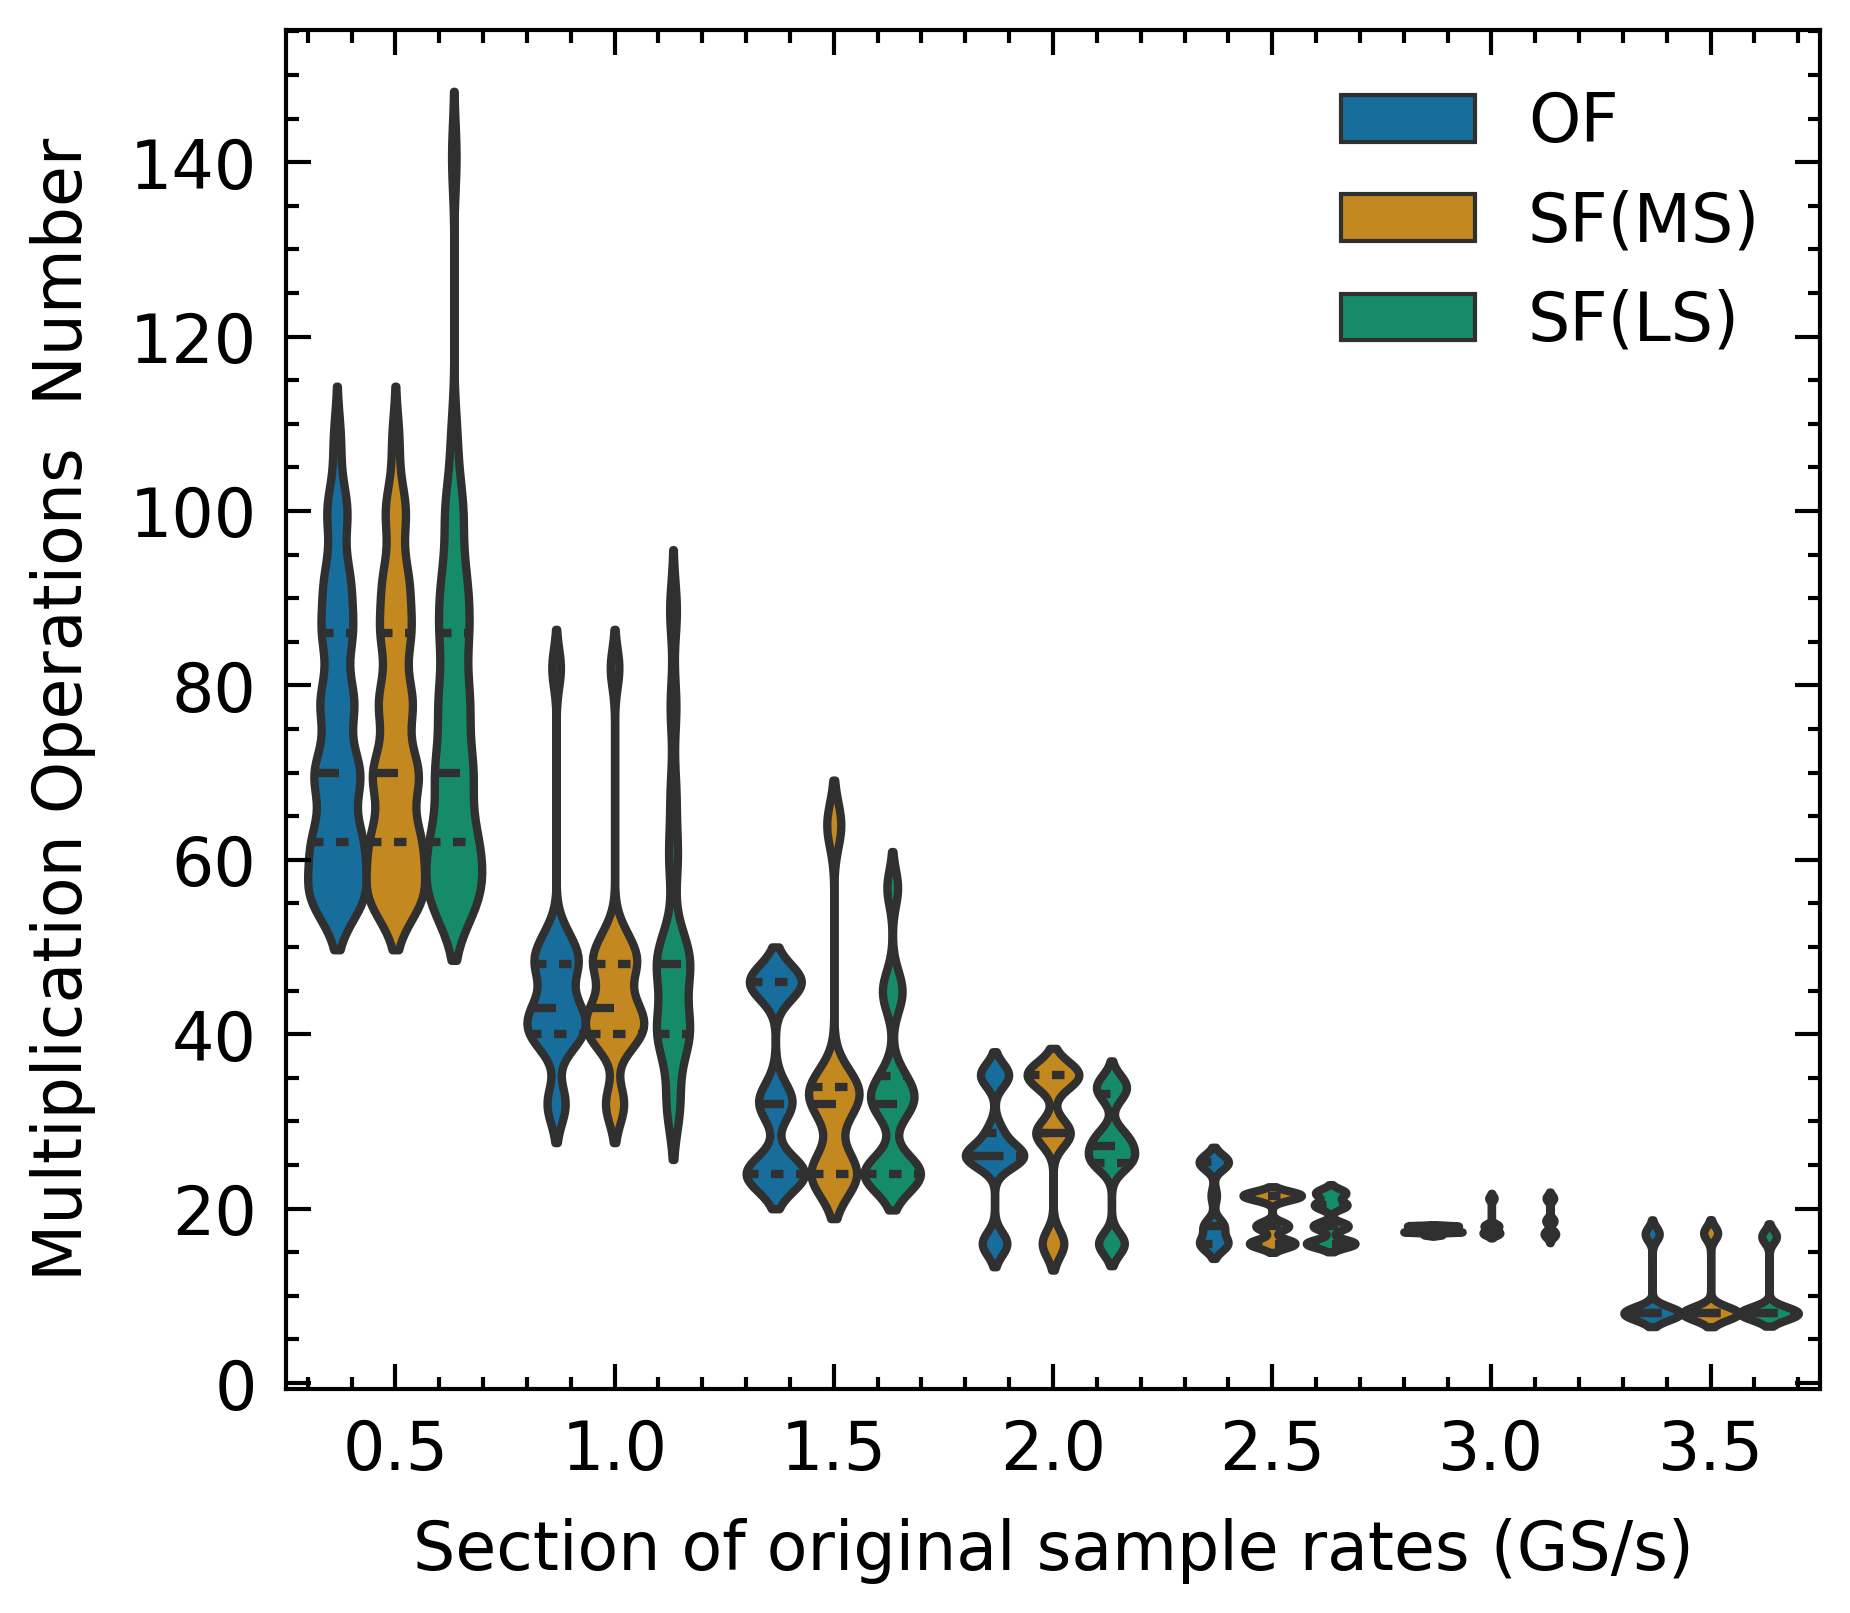

<IPython.core.display.Javascript object>

In [ ]:
# 分析频率偏移与目标频率的关系。
ax = sns.violinplot(
    data=df_all[
        (df_all["section"] >= 1) & (df_all["method"].isin(["optimal", "ms", "ls"]))
    ],
    x="section",
    y="mul",
    hue="method",
    palette="colorblind",
    #     scale="count",
    inner="quartile",
    #     split=True,
    fliersize=2,
)
ax.set(xlabel="Section of original sample rates (GS/s)")
ax.set(ylabel="Multiplication Operations  Number")

ticks = ax.get_xticks()
xlabels = ["%.1f" % (x * 0.5 + 0.5) for x in ticks]
ax.set_xticklabels(xlabels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    #     loc="lower left",
    handles=handles,
    labels=["OF", "SF(MS)", "SF(LS)"],
)

ax.figure.set_size_inches(3.3, 3)

file = os.path.join("figures", "freq2mul_4g.pdf")
ax.get_figure().savefig(file)

In [ ]:
df_all[(df_all["method"].isin(["optimal", "ms", "ls"]))].groupby(
    ["section", "method"]
).describe()["mul"]

count      mean        std  min       25%       50%  \
section method                                                         
0       ls        2500  839.0628  8505.2248  108       146       206   
        ms        2500  839.0628  8505.2248  108       146       206   
        optimal   2500  839.0628  8505.2248  108       146       206   
1       ls        2500  87.23984  19.617963   66        76        86   
        ms        2500   85.0984  14.068542   66        76        84   
        optimal   2500   85.0984  14.068542   66        76        84   
2       ls        2500  60.14904  18.235709   38        48        58   
        ms        2500    54.284   12.37073   38        48        52   
        optimal   2500    54.284   12.37073   38        48        52   
3       ls        2500   40.2528  11.762358   30        30        38   
        ms        2500 39.911467   12.94249   30        30        38   
        optimal   2500   41.7044  11.865862   30        30        38   
4       ls        2500  31.67416  6.7421536   20      30.4      32.8   
        ms        2500 34.933333  8.0193621   20 34.666667 34.666667   
        optimal   2500   31.5796  7.0576254   20        31        31   
5       ls        2500  22.85696  2.5121624   20        20        22   
        ms        2500   23.0408  2.6610464   20        20        22   
        optimal   2500   24.4808  4.3926017   20        20        22   
6       ls        2500  22.24176  1.6873657 20.4      20.8      22.4   
        ms        2500   21.8624  1.3332731 20.8      20.8        22   
        optimal   2500   21.1762 0.67500801 20.5 20.666667 20.666667   
7       ls        2500     12.08  4.1608322   10        10        10   
        ms        2500     12.16  4.3208643   10        10        10   
        optimal   2500  12.12664  4.2546534   10        10        10   

                      75%       max  
section method                       
0       ls            398    389660  
        ms            398    389660  
        optimal       398    389660  
1       ls             94     177.6  
        ms             94       112  
        optimal        94       112  
2       ls           70.8       110  
        ms             58        96  
        optimal        58        96  
3       ls           42.4      69.2  
        ms      41.333333        72  
        optimal        57        57  
4       ls           39.2        40  
        ms      41.333333 41.333333  
        optimal 34.666667 41.333333  
5       ls           24.8      26.4  
        ms             26        26  
        optimal        30        30  
6       ls           24.8      24.8  
        ms             22      24.8  
        optimal        22        22  
7       ls             10      20.4  
        ms             10      20.8  
        optimal        10      20.8

<IPython.core.display.Javascript object>

In [ ]:
df_all.groupby(["method"]).describe()["mul"]

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
fixed,20000,428.73725,10016.158,34.000579,42.667117,71.999714,153.99367,1235742.9
ll,20000,132.98885,2567.1913,8,18,27.2,61.2,298806
ls,20000,126.59705,2853.1446,8,18,27.2,61.2,367960
ml,20000,132.96653,2567.1832,8,18,32,62,298806
ms,20000,126.13059,2853.15,8,18,32,56,367960
optimal,20000,125.94089,2853.155,8,17.333333,26,56,367960


<IPython.core.display.Javascript object>

In [ ]:
df_all.groupby(["method"]).describe()["add"]

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
fixed,20000,360.48368,8293.2643,29.00049,36.333715,61.499758,131.74464,1019527.8
ll,20000,110.71563,2001.8881,7,16,24,54,226735
ls,20000,106.12578,2339.0487,7,16,24,54,303096
ml,20000,110.6915,2001.8784,7,16,28,54,226735
ms,20000,105.67036,2339.0523,7,16,28,49,303096
optimal,20000,105.5055,2339.0562,7,15.333333,23,49,303096


<IPython.core.display.Javascript object>

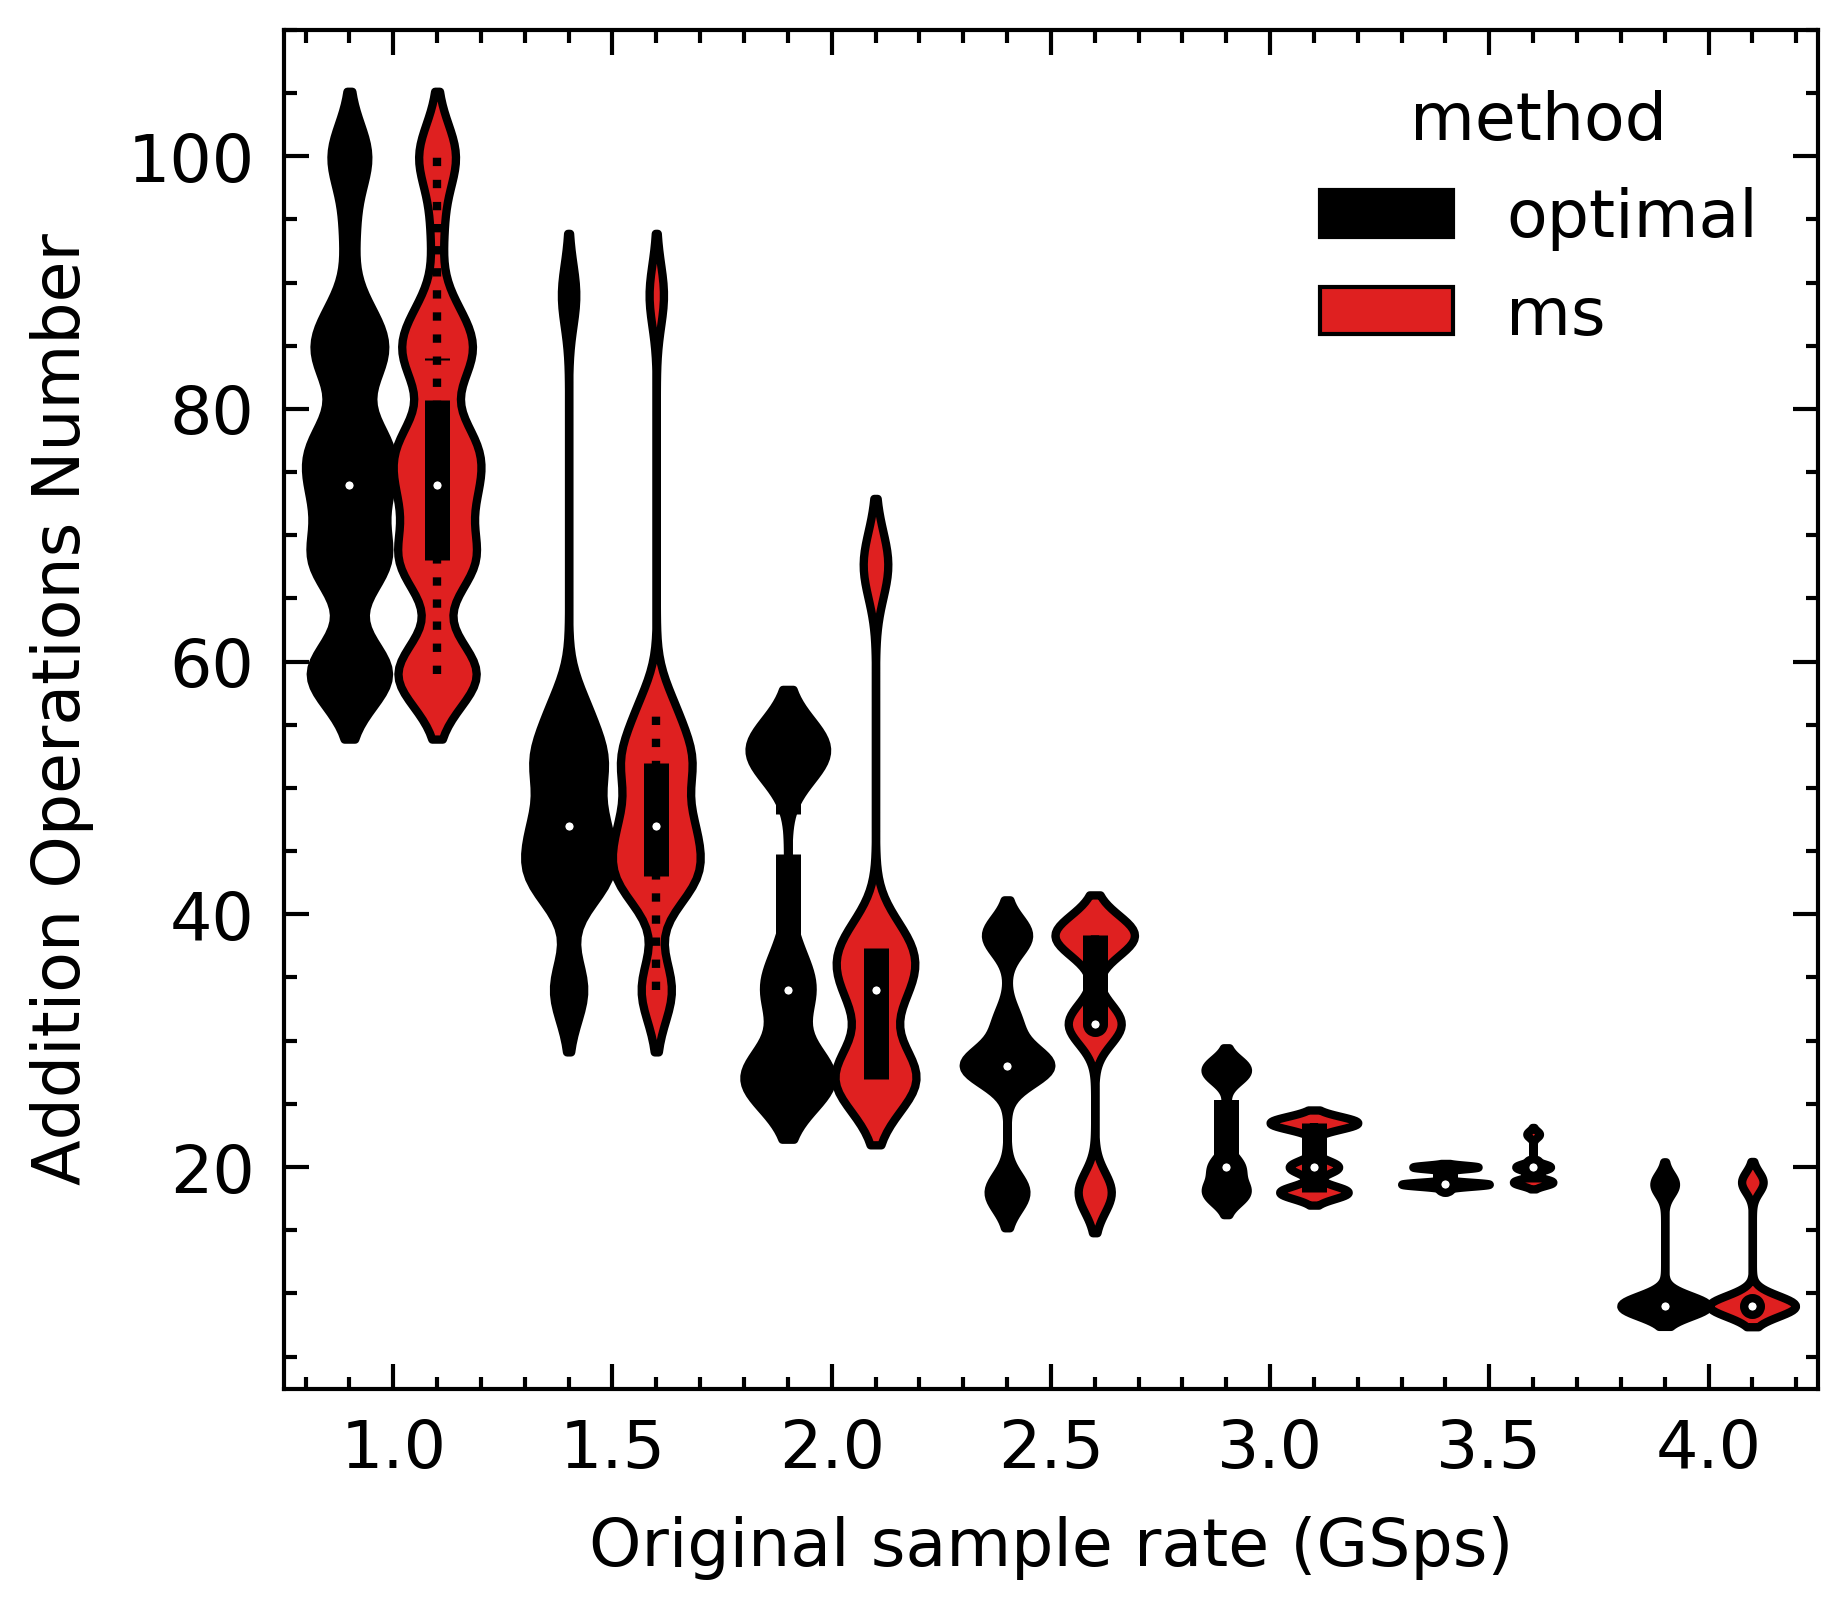

<IPython.core.display.Javascript object>

In [ ]:
# 分析频率偏移与目标频率的关系。
ax = sns.violinplot(
    data=df_all[(df_all["section"] >= 1) & (df_all["method"].isin(["optimal", "ms"]))],
    x="section",
    y="add",
    hue="method",
    fliersize=2,
)
ax.set(xlabel="Original sample rate (GSps)")
ax.set(ylabel="Addition Operations Number")

ticks = ax.get_xticks()
xlabels = ["%.1f" % (x * 0.5 + 1.0) for x in ticks]
ax.set_xticklabels(xlabels)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(
#     loc="lower left",
#     handles=handles,
#     labels=["OF", "SF(MS)", "MA", "Direct", "OFDirect"],
# )

ax.figure.set_size_inches(3.3, 3)

# file = os.path.join(workdir, "figures", "freq2shift.pdf")
# ax.get_figure().savefig(file)

In [ ]:
(df_all["mul"] / df_all["add"]).describe()

count        120000
mean      1.1251211
std     0.034523312
min       1.0471698
25%       1.1071429
50%       1.1111111
75%       1.1496063
max       1.3283204
dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
import sys

sys.executable

'/usr/bin/python3'

<IPython.core.display.Javascript object>